# Customer Segmentation Using RFM Analysis and KMeans Clustering

## Project Objective

This project aims to segment customers based on their purchasing behavior using a combination of RFM (Recency, Frequency, Monetary) analysis and KMeans clustering. By identifying distinct customer groups, businesses can personalize marketing strategies, optimize engagement, and improve customer retention.

## Business Context

In the highly competitive e-commerce space, understanding customer behavior is critical. Traditional one-size-fits-all approaches to customer engagement are inefficient and costly. By segmenting customers based on how recently, how often, and how much they spend, businesses can better allocate resources and tailor campaigns.

The RFM framework enables this segmentation:
- **Recency** – How recently a customer made a purchase
- **Frequency** – How often they made a purchase
- **Monetary** – How much money they spent

These three dimensions are powerful indicators of customer loyalty and value.

## Dataset Overview

This dataset contains real transactional data from a UK-based and registered non-store online retail company. It includes all purchases made between December 1, 2010, and December 9, 2011, primarily by corporate clients.

### Dataset Characteristics:
- **Type**: Multivariate, Sequential, Time-Series
- **Subject Area**: Business
- **Tasks**: Classification, Clustering
- **Feature Types**: Integer, Real
- **Number of Instances**: 541,909
- **Number of Features**: 6

The dataset includes invoice numbers, item codes, quantities, timestamps, customer IDs, and unit prices.

## Methodology

This project follows a structured data science workflow designed to extract actionable insights from raw transactional data and generate meaningful customer segments. The key steps are as follows:

### 1. Data Exploration  
Initial exploration of the dataset to understand its structure, dimensions, feature types, and distributions. This includes:
- Previewing records and checking for missing values
- Understanding the time range and frequency of transactions
- Exploring customer and product diversity
- Summarizing key statistics

### 2. Data Cleaning  
Essential data quality checks are performed to ensure reliability and integrity, such as:
- Removing transactions with missing `CustomerID` or other essential fields
- Filtering out canceled orders (e.g., those with invoice numbers containing 'C')
- Removing entries with non-positive quantities or prices
- Converting date columns to datetime objects

### 3. Feature Engineering  
We engineer RFM features for each customer based on their transaction history:
- **Recency**: Days since the customer's last purchase
- **Frequency**: Total number of transactions
- **Monetary**: Total amount spent by the customer

These features provide a comprehensive view of customer behavior.

### 4. Outlier Detection and Analysis  
Outliers can distort clustering performance. This step includes:
- Visual inspection using boxplots and distribution plots
- Identifying and optionally removing extreme values in RFM features
- Analyzing the business implications of outliers (e.g., unusually high spenders)

### 5. Clustering with KMeans  
Once the RFM data is standardized, we apply the KMeans clustering algorithm to group customers into behavior-based segments:
- Optimal cluster count determined using the **Elbow Method** and **Silhouette Score**
- Clusters are analyzed to understand how they differ in terms of RFM values

### 6. Customer Profiling  
Each cluster is profiled to understand customer characteristics:
- Identification of segments like loyal customers, high spenders, dormant users, and new customers
- Interpretation of segment behavior for business applications such as targeted marketing or retention strategies

This methodology ensures that insights are not only statistically valid but also practically actionable.


## Expected Outcome

By the end of this project, we will have a clear understanding of customer segments within the dataset. These insights can inform targeted retention strategies, personalized offers, and customer lifetime value estimation.


#### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#### Reading data from sheet 1 of the data set contaning the data of year 2009-2010


In [3]:
df =  pd.read_excel("online_retail_II.xlsx",sheet_name =0)


### Data Exploration

In [4]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [6]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [7]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [8]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
df[df["Customer ID"].isnull()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [10]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


**Quantity**: Wide range (min = -9600, max = 19152) with a high standard deviation (107.42), indicating **outliers and returns** (negative values).
- **Invoice Date**: Covers about one year of transactions; suitable for **time-based RFM analysis**.
- **Unit Price**: Presence of **invalid negative values (-53,594.36)** and extremely high prices suggests **data entry errors and outliers**.
- **Customer ID**: Around **20% of entries lack CustomerID**, which are not usable for RFM and may be dropped.


#### Invoice  Analysis

In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [12]:
df[df["Invoice"].astype(str).str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [13]:
df[df["Invoice"].astype(str).str.startswith("")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [14]:
df[df["Invoice"].astype(str).str.startswith("C")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [15]:
df[(df["Invoice"].astype(str).str.startswith("C"))& (df["Quantity"]<0)] 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


####  Invoice Type Analysis Summary

- **Invoices with 'C' prefix**: Represent **canceled transactions**. All have **negative quantities**, indicating **returns** that are not relevant for RFM analysis.
- **Invoices with 'A' prefix**: Only 3 entries found. These are **"Adjust bad debt"** records with **missing Customer IDs** and **extremely negative prices**, making them **invalid for segmentation**.
- **Invoices with NaN**: Indicate missing or malformed invoice numbers, which are **not usable**.
- **6-digit numeric invoices**: Represent **valid, completed transactions** that are suitable for customer segmentation.

→ Based on this, we will **retain only 6-digit numeric invoice entries** and **exclude all others** to ensure clean and reliable data for RFM-based clustering.


In [ ]:
df["StockCode"].unique()

array([85048, '79323P', '79323W', ..., 22935, 22933, 21120], dtype=object)

In [17]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [18]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [19]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


#### Filtering Invalid Stock Codes

This section demonstrates how to identify `StockCode` values in a DataFrame that do not conform to two specific formats:
- Exactly 5 digits (e.g., '12345')
- 5 digits followed by one or more letters (e.g., '12345A' or '12345ABC')

The code in the next cell:
1. Creates a sample DataFrame with various `StockCode` formats.
2. Converts the `StockCode` column to string type to ensure consistent regex processing.
3. Uses regex patterns to filter out `StockCode` values that do not match either pattern.
4. Returns the unique `StockCode` values that fail both conditions.

#### Regex Pattern Explanation

The query uses two regex patterns to validate `StockCode` values:

1. **`^\\d{5}$`**:
   - **`^`**: Anchors the match to the start of the string, ensuring no characters precede the pattern.
   - **`\\d{5}`**: Matches exactly 5 digits (0–9). The `\\d` represents any digit, and `{5}` specifies exactly 5 occurrences.
   - **`$`**: Anchors the match to the end of the string, ensuring no characters follow the 5 digits.
   - **Example Matches**: '12345', '00000'
   - **Non-Matches**: '123' (too short), '123456' (too long), '12345A' (contains a letter)

2. **`^\\d{5}[a-zA-Z]+$`**:
   - **`^`**: Anchors the match to the start of the string.
   - **`\\d{5}`**: Matches exactly 5 digits, as above.
   - **`[a-zA-Z]+`**: Matches one or more letters (uppercase or lowercase). The `[a-zA-Z]` defines the character set (any letter), and `+` requires at least one letter.
   - **`$`**: Anchors the match to the end of the string, ensuring no additional characters follow.
   - **Example Matches**: '12345A', '12345ABC'
   - **Non-Matches**: '12345' (no letters), '12345A1' (contains a digit after letters), '1234AB' (only 4 digits)

#### How the Query Works
The query uses `df['StockCode'].str.match()` to test each `StockCode` against these patterns. The condition `(df['StockCode'].str.match('^\\d{5}$') == False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == False)` identifies `StockCode` values that fail *both* patterns, meaning they are invalid. The `.unique()` method ensures only unique invalid `StockCode` values are returned.

The output will display the original DataFrame and the unique invalid `StockCode` values for review.

In [20]:
df[df['StockCode'].str.contains("^DOT")].count() 

Invoice        736
StockCode      736
Description    735
Quantity       736
InvoiceDate    736
Price          736
Customer ID      0
Country        736
dtype: int64

In [21]:
df[df['StockCode'].str.contains("^POST")].count() 

Invoice        865
StockCode      865
Description    862
Quantity       865
InvoiceDate    865
Price          865
Customer ID    822
Country        865
dtype: int64

In [22]:
import numpy as np
non_standard_codes = ['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004', 'DCGS0076', 'C2', 
                      'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072', 'gift_0001_20', 
                      'DCGS0044', 'TEST002', 'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 
                      'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70', 'gift_0001_90', 
                      'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027', 'DCGS0036', 'DCGS0039', 'DCGS0060', 
                      'DCGS0056', 'DCGS0059', 'GIFT', 'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 
                      'DCGSSBOY', 'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B', 'DCGS0041', 
                      'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE']


# Filter non-standard StockCodes
df_non_standard = df[df["StockCode"].isin(non_standard_codes)]

# Group by StockCode and count unique Customer IDs
result = df_non_standard.groupby("StockCode")["Customer ID"].count()

# Convert to DataFrame for easier visualization
result_df = result.reset_index().rename(columns={"Customer ID": "CustomerIdcount"})

result_df[result_df['CustomerIdcount']>0]

,StockCode,CustomerIdcount
1,ADJUST,61
2,ADJUST2,3
5,BANK CHARGES,26
6,C2,125
8,D,97
38,M,650
39,PADS,15
40,POST,822
42,SP1002,2
43,TEST001,15



The following code block filters out transactions that involve **non-standard StockCodes** such as administrative codes (e.g., `POST`, `BANK CHARGES`, `ADJUST`, etc.), test entries (`TEST001`, `TEST002`), or non-product/service entries.

→ This analysis helps **quantify the frequency of non-standard codes** and reinforces why such records should be excluded from clustering or customer profiling, as they do not represent meaningful product purchases.


#### StockCode Analysis

In [ ]:

df[df['StockCode'].str.contains("^ADJUST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.0,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.0,EIRE
70978,495734,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,205.82,14911.0,EIRE
70979,C495737,ADJUST,Adjustment by john on 26/01/2010 16,-1,2010-01-26 16:23:00,10.50,16154.0,United Kingdom
...,...,...,...,...,...,...,...,...
208670,C509474,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,72.45,16422.0,United Kingdom
208671,C509475,ADJUST,Adjustment by Peter on 24/05/2010 1,-1,2010-05-24 11:13:00,358.47,17364.0,United Kingdom
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.0,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.0,United Kingdom


In [24]:
df[df['StockCode'].str.contains("^TEST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.5,12346.0,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.5,12346.0,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.5,12346.0,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.5,12346.0,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.0,12346.0,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.0,NaN,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.5,12346.0,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.5,12346.0,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.5,12346.0,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.5,12346.0,United Kingdom


In [25]:
df[df['StockCode'].str.contains("^BANK")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.0,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.0,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom
55948,C494438,BANK CHARGES,Bank Charges,-1,2010-01-14 12:15:00,767.99,NaN,United Kingdom
94431,498269,BANK CHARGES,Bank Charges,1,2010-02-17 15:03:00,15.00,16928.0,United Kingdom
...,...,...,...,...,...,...,...,...
450634,C532203,BANK CHARGES,Bank Charges,-1,2010-11-11 12:31:00,15.00,NaN,United Kingdom
455268,532637,BANK CHARGES,Bank Charges,1,2010-11-12 16:18:00,15.00,13174.0,United Kingdom
493162,535474,BANK CHARGES,Bank Charges,1,2010-11-26 13:56:00,15.00,16928.0,United Kingdom
507344,536779,BANK CHARGES,Bank Charges,1,2010-12-02 15:08:00,15.00,15823.0,United Kingdom


In [26]:
df[df['StockCode'].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [27]:
df[df['StockCode'].str.contains("^D")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [28]:
df[df['StockCode'].str.contains("^M")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.0,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom
9259,C490126,M,Manual,-1,2009-12-03 18:12:00,5.95,15884.0,United Kingdom
9307,C490129,M,Manual,-1,2009-12-03 18:26:00,1998.49,15482.0,United Kingdom
...,...,...,...,...,...,...,...,...
521074,537800,M,Manual,12,2010-12-08 13:08:00,0.19,12748.0,United Kingdom
521122,537804,M,Manual,12,2010-12-08 13:17:00,2.95,12748.0,United Kingdom
521124,537804,M,Manual,12,2010-12-08 13:17:00,0.19,12748.0,United Kingdom
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom


In [29]:
df[df['StockCode'].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


#### StockCode Analysis Summary for Clustering

This section presents an analysis of specific `StockCode` values to determine their relevance and appropriateness for customer segmentation using clustering techniques.

---

#### StockCode Summary Table

| StockCode        | Description / Nature                | Issue Identified                               | Recommended Action                       | Include in Clustering? |
|------------------|--------------------------------------|-------------------------------------------------|-------------------------------------------|--------------------------|
| POST             | Postage fee                          | Non-product charge (shipping cost)             | Not customer purchase behavior            | No                       |
| BANK CHARGES     | Bank-related transaction             | Not an item/product, administrative            | Irrelevant to customer profiling          | No                       |
| PADS             | Pads or cushion product              | Mostly `0.001` prices, one outlier return      | Handle prices carefully or impute         | Conditionally Yes        |
| C2               | Possibly packaging fee               | Low-value item, possibly not sold              | Not a purchased product                   | No                       |
| DOT              | Manual adjustments / Placeholder     | Often used internally for unknowns             | No business meaning                        | No                       |
| M                | Manual entry (rare)                  | Appears once, unclear item type                | Lacks pattern/volume                      | No                       |
| S                | Sample product                       | Test/sample item, price = 0                    | No monetary value                          | No                       |
| CRUK             | Charity item                         | Price = 0, donation purpose                    | Not customer intent or value              | No                       |
| AMAZONFEE        | Amazon service charge                | Platform-level cost, not a product             | Not related to sales clustering           | No                       |
| ADJUST           | Manual accounting adjustments        | Operational/finance use                        | Not reflective of purchase behavior       | No                       |

---

### Summary and Recommendation

- Only **`PADS`** may be conditionally retained in clustering if pricing anomalies are properly handled and the product is validated across multiple customer transactions.
- All other listed `StockCode` entries represent administrative, service-related, sample, or irrelevant categories and should be **excluded from clustering** to ensure meaningful segmentation based on customer purchase behavior.
- Additionally, **only `StockCode` values that are fully numeric** (e.g., `10002`, `85048`) and represent actual product items should be included in the clustering process. This ensures the focus remains on real customer purchase activity and avoids introducing noise from operational or non-transactional entries.

---

This preprocessing step is essential to build a high-quality customer segmentation model and avoid misleading patterns during clustering.


## DATA CLEANING

In [30]:
clean_df = df.copy()

**Removing Rows having null `Customer ID`s**

In [31]:
clean_df.dropna(subset=["Customer ID"],inplace =True)

**Only Including `Invoice` having exact 6 digits reset with prefix 'A','C' and nan are excluded**

In [32]:
clean_df["Invoice"]  = clean_df["Invoice"].astype("str")

mask =( clean_df["Invoice"].str.match("^\\d{6}$") ==True)

clean_df  =clean_df[mask]

clean_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


**Numeric `StockCode` of 5 digits and alphabatic sufix and PADS are included rest of all are excluded**

In [33]:
clean_df["StockCode"]  = clean_df["StockCode"].astype("str")

mask= (
   ( clean_df["StockCode"].str.match("^\\d{5}$") ==True)|
    ( clean_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") ==True)|
    ( clean_df["StockCode"].str.match("^PADS$") ==True)
)

clean_df =clean_df[mask]

clean_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [34]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [35]:
len(clean_df[clean_df["Price"]==0])

28

In [36]:
clean_df = clean_df[clean_df["Price"]>0]

In [37]:
clean_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [38]:
len(clean_df)/len(df)

0.7732429238325965

#### Summary After Data Cleaning

- Out of the original dataset, **77.32% of the rows were retained** after cleaning.
- **22.68% of the data was removed** due to missing `Customer ID`, negative `Quantity` or `Price`, and invalid `StockCodes`.

#### Cleaned Dataset Overview 

| Column         | Summary |
|----------------|---------|
| **Quantity**   | Ranges from **1 to 19,152**, average is **13.62**. Some large values still present (possible outliers). |
| **InvoiceDate**| Spans from **Dec 2009 to Dec 2010**, suitable for time-based analysis (like RFM). |
| **Price**      | Ranges from **0.001 to 295**, with an average of **2.99**. Most prices are low, with few expensive items. |
| **Customer ID**| Now all rows have valid IDs (**12346 to 18287**), enabling reliable customer-level clustering. |

→ The dataset is now suitable for modeling. However, consider handling **outliers and feature scaling** for better clustering performance.


In [39]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


## Feature Engineering

In [40]:
clean_df["SalesTotal"] = clean_df["Quantity"]* clean_df["Price"]
clean_df.head(5)

C:\Users\admin\AppData\Local\Temp\ipykernel_19060\3125106463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["SalesTotal"] = clean_df["Quantity"]* clean_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [41]:
aggr_df = clean_df.groupby(by="Customer ID",as_index=False) \
          .agg(
              MonetaryValue=("SalesTotal","sum"),
              Frequency=("Invoice","nunique"),
              LastInvoiceDate =("InvoiceDate","max")          )
aggr_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [42]:
max_invoice_date = aggr_df["LastInvoiceDate"].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [74]:
aggr_df["Recency"] = (max_invoice_date-aggr_df["LastInvoiceDate"]).dt.days


####  RFM Summary Overview

The RFM (Recency, Frequency, Monetary) analysis provides a quantitative method to segment customers based on their purchasing behavior.

####  Summary of Steps:

1. **SalesTotal Calculation**
   - A new column `SalesTotal` was created as:
     ```
     SalesTotal = Quantity × Price
     ```
   - It represents the total amount spent on each transaction.

2. **Customer-Level Aggregation**
   - Grouped the data by `Customer ID` to calculate:
     - `MonetaryValue`: Total revenue from each customer.
     - `Frequency`: Number of unique purchase occasions (Invoice count).
     - `LastInvoiceDate`: Most recent purchase date for each customer.

3. **Max Invoice Date Extraction**
   - Fetched the latest date of purchase across all customers:
     ```
     max_invoice_date = aggr_df["LastInvoiceDate"].max()
     ```

4. **Recency Calculation**
   - Recency was calculated as the number of days since the customer's last transaction:
     ```
     Recency = (max_invoice_date - LastInvoiceDate).days
     ```

---

#### Final Aggregated RFM Table Preview



In [76]:
aggr_df.head(7)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
5,12352.0,343.80,2,2010-11-29 10:07:00,10
6,12353.0,317.76,1,2010-10-27 12:44:00,43


**This RFM dataset will be used in downstream customer segmentation analysis to target specific behavior-based customer groups more effectively.**

## Outlier Detection and Analysis  


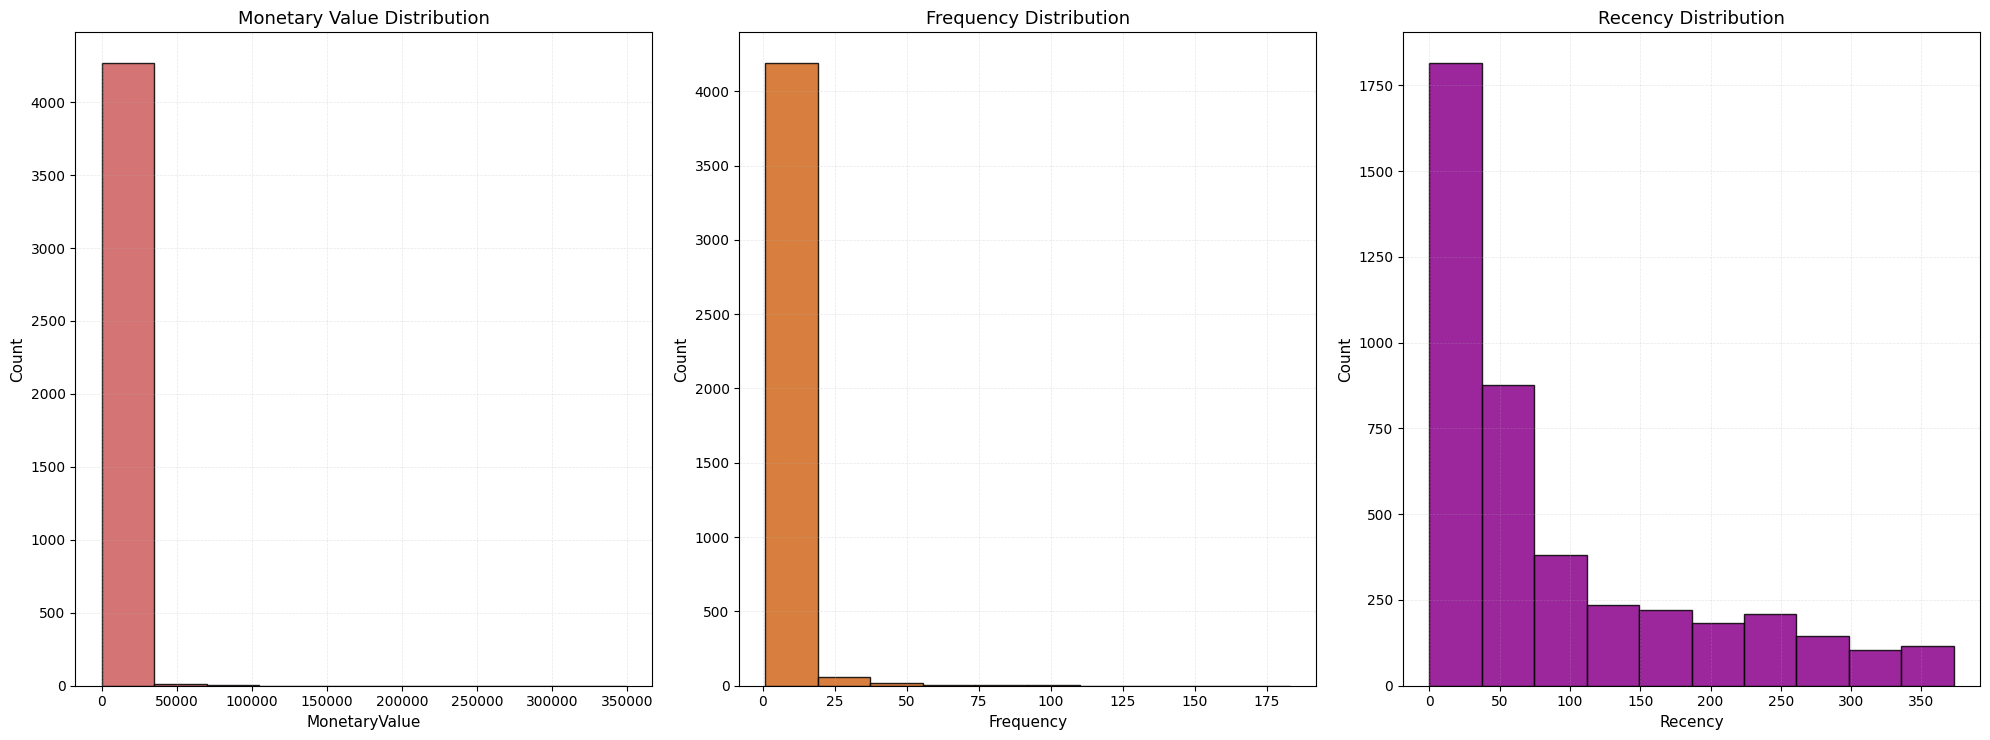

In [44]:
plt.figure(figsize=(20, 7.5))

titles = ["Monetary Value Distribution", "Frequency Distribution", "Recency Distribution"]
columns = ['MonetaryValue', 'Frequency', 'Recency']
colors = ['indianred', 'chocolate', 'darkmagenta']

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.hist(aggr_df[columns[i]], bins=10, color=colors[i], edgecolor='black', alpha=0.85)
    plt.title(titles[i], fontsize=13)
    plt.xlabel(columns[i], fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.3)

plt.tight_layout()
plt.show()


The distribution plots for **Monetary Value**, **Frequency**, and **Recency** reveal clear patterns and the presence of outliers:

- **Monetary Value**:  
  The majority of customers have low spending values. However, the long tail to the right shows that a few customers contribute exceptionally high revenue, indicating strong positive outliers. These high spenders may skew the mean and affect clustering.

- **Frequency**:  
  Most customers have made a small number of purchases (low frequency). A few customers have very high purchase counts, which are seen as outliers and may represent loyal or bulk-buying customers.

- **Recency**:  
  A high count of customers have low recency values, meaning they purchased recently. There is a gradual decline toward higher recency values, but a few customers have extremely high recency — they haven't purchased in a long time, acting as outliers in the opposite direction.


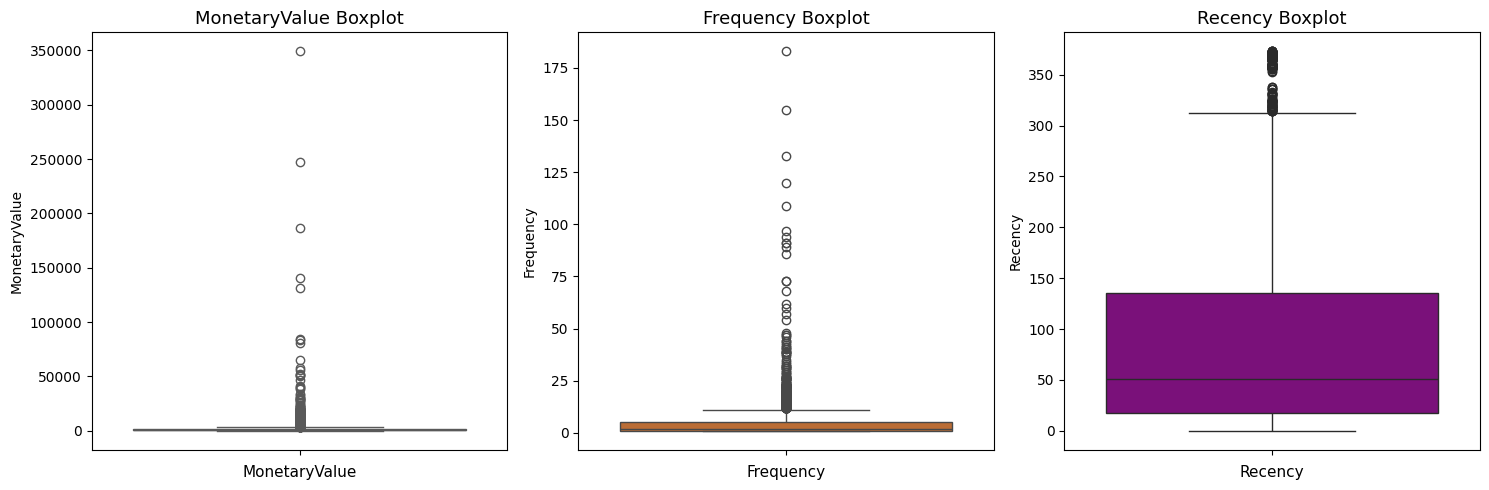

In [77]:
plt.figure(figsize=(15, 5))

columns = ['MonetaryValue', 'Frequency', 'Recency']
colors = ['indianred', 'chocolate', 'darkmagenta']
titles = [f"{col} Boxplot" for col in columns]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=aggr_df[columns[i]], color=colors[i])
    plt.title(titles[i], fontsize=13)
    plt.xlabel(columns[i], fontsize=11)

plt.tight_layout()
plt.show()

![My Chart](boxplot.png)

#### RFM Boxplot Summary

##### 1 MonetaryValue Boxplot
- Displays **high positive skewness**.
- Majority of customers spend relatively small amounts.
- **Several extreme outliers** with very high monetary value indicate a **small group of high-value customers**.

##### 2️ Frequency Boxplot
- Most customers make **very few purchases**.
- A small subset of customers purchase frequently.
- **Long tail of outliers** suggests the presence of **loyal and frequent buyers**.

##### 3️ Recency Boxplot
- Distribution appears more **spread out** compared to the others.
- **Lower values (closer to 0)** represent recent customers.
- **Higher values and outliers** indicate **inactive or churned customers**.


#### Outlier Detection using IQR Method for RFM Features

To identify and remove extreme values from the dataset, we use the **Interquartile Range (IQR)** method for detecting outliers in all three RFM features — `MonetaryValue`, `Frequency`, and `Recency`.

####  Steps for Each Feature:
1. **Calculate Quartiles:**
   - Q1 (25th percentile)
   - Q3 (75th percentile)
2. **Compute IQR:**
   - IQR = Q3 - Q1
3. **Determine Bounds:**
   - Lower Bound = Q1 - 1.5 × IQR
   - Upper Bound = Q3 + 1.5 × IQR
4. **Identify Outliers:**
   - Any data point < Lower Bound or > Upper Bound is treated as an **outlier**.

This method was applied individually to:
-  `MonetaryValue`: To detect customers with extremely low or high spending.
-  `Frequency`: To find unusually frequent or infrequent shoppers.
-  `Recency`: To flag customers with unusually recent or old last purchases.

These outliers can be further analyzed or removed to ensure that the dataset reflects the typical customer behavior and improves the accuracy of segmentation or modeling.


In [46]:
M_q1 = aggr_df["MonetaryValue"].quantile(0.25)
M_q3 = aggr_df["MonetaryValue"].quantile(0.75)
M_IQR = M_q3-M_q1

lower = M_q1 -1.5*M_IQR
upper = M_q3+1.5*M_IQR

monetary_outlier_df = aggr_df[(aggr_df['MonetaryValue']>=upper) | (aggr_df['MonetaryValue']<=lower)]

monetary_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [47]:
F_q1 = aggr_df["Frequency"].quantile(0.25)
F_q3 = aggr_df["Frequency"].quantile(0.75)
F_IQR = F_q3-F_q1

lower = F_q1 -1.5*F_IQR
upper = F_q3+1.5*F_IQR

frequency_outlier_df = aggr_df[(aggr_df['Frequency']>=upper) | (aggr_df['Frequency']<=lower)]

frequency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,329.00000,329.000000,329.000000,329,329.000000
mean,15344.12766,12855.607374,21.863222,2010-11-23 07:37:57.811549952,16.237082
min,12417.00000,1094.390000,11.000000,2010-05-12 16:51:00,0.000000
25%,13798.00000,3972.760000,12.000000,2010-11-21 10:38:00,2.000000
50%,15498.00000,5921.650000,15.000000,2010-12-01 17:24:00,8.000000
75%,16839.00000,10665.690000,22.000000,2010-12-07 09:55:00,18.000000
max,18260.00000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1743.38358,29135.307056,20.710758,NaN,26.190176


In [48]:
R_q1 = aggr_df["Recency"].quantile(0.25)
R_q3 = aggr_df["Recency"].quantile(0.75)
R_IQR = R_q3-R_q1

lower = R_q1 -1.5*R_IQR
upper = R_q3+1.5*R_IQR

recency_outlier_df = aggr_df[(aggr_df['Recency']>=upper) | (aggr_df['Recency']<=lower)]

recency_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,174.000000,174.000000,174.000000,174,174.000000
mean,15426.172414,411.662075,1.241379,2009-12-25 03:33:44.137931008,349.402299
min,12439.000000,2.950000,1.000000,2009-12-01 10:49:00,312.000000
25%,14125.500000,145.620000,1.000000,2009-12-07 13:38:45,324.250000
50%,15392.000000,232.715000,1.000000,2009-12-14 16:49:00,360.000000
75%,16792.250000,352.462500,1.000000,2010-01-19 04:47:00,367.000000
max,18212.000000,9471.500000,7.000000,2010-01-31 16:02:00,373.000000
std,1619.409021,931.838612,0.782253,NaN,21.511368


In [49]:
non_outliers_df = aggr_df[(~aggr_df.index.isin(monetary_outlier_df.index)) & (~aggr_df.index.isin(frequency_outlier_df.index)) &(~aggr_df.index.isin(recency_outlier_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3615.000000,3615.000000,3615.000000,3615,3615.000000
mean,15374.260858,902.618201,2.891286,2010-09-14 21:37:19.219917056,85.651176
min,12346.000000,1.550000,1.000000,2010-02-01 12:10:00,0.000000
25%,13899.000000,293.980000,1.000000,2010-08-02 12:32:30,21.000000
50%,15387.000000,612.760000,2.000000,2010-10-15 11:47:00,55.000000
75%,16856.500000,1289.080000,4.000000,2010-11-18 10:28:00,129.000000
max,18287.000000,3788.210000,10.000000,2010-12-09 20:01:00,311.000000
std,1696.037616,815.261408,2.175496,NaN,83.234101


####  Final Cleaned Dataset (Non-Outliers)

We are removing the indexes that are present in the `monetary_outlier_df`, `frequency_outlier_df`, and `recency_outlier_df` to create a new dataframe `non_outliers_df`. 

This cleaned dataframe contains customers who are not considered outliers in any of the three RFM metrics. It ensures that the analysis is based only on typical customer behavior, without extreme values that could skew the results.


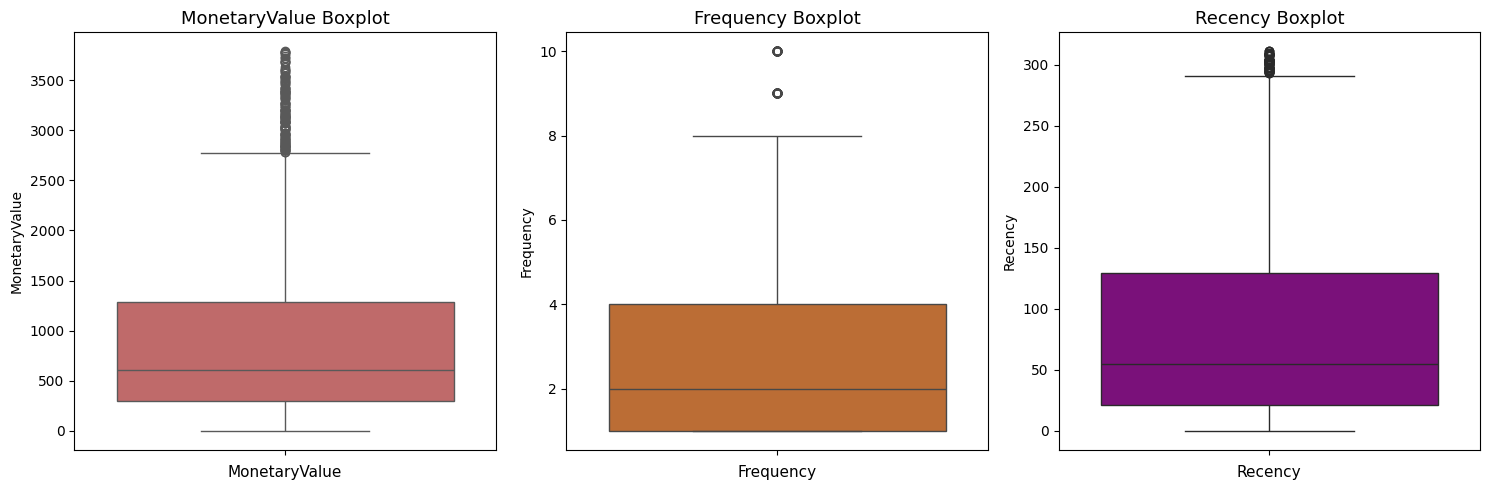

In [ ]:
plt.figure(figsize=(15, 5))

columns = ['MonetaryValue', 'Frequency', 'Recency']
colors = ['indianred', 'chocolate', 'darkmagenta']
titles = [f"{col} Boxplot" for col in columns]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=non_outliers_df[columns[i]], color=colors[i])
    plt.title(titles[i], fontsize=13)
    plt.xlabel(columns[i], fontsize=11)

plt.tight_layout()
plt.show()

#### Outlier Detection Summary: Before vs After

The updated boxplot visualization (above) highlights the **presence of outliers** in the RFM metrics before filtering:

- **MonetaryValue Boxplot**:
  - Shows a large number of high-end outliers.
  - The distribution is right-skewed with many data points significantly above the upper whisker (~2800+).
  - Indicates a small set of customers spending much more than the average.

- **Frequency Boxplot**:
  - Very few outliers observed (around 9–10 purchases).
  - Most customers purchase between 1 to 4 times.
  - The distribution remains relatively compact compared to Monetary.

- **Recency Boxplot**:
  - Several outliers beyond the upper whisker (~290+ days).
  - Majority of customers are recent (lower recency is better).
  - Skewed distribution due to few inactive customers.

#### Summary

This boxplot visualization confirms that **outliers exist in all three dimensions**—especially in **MonetaryValue** and **Recency**. These outliers can distort the analysis. Hence, we filtered out these data points (based on IQR thresholds) to obtain a more reliable dataset (`non_outliers_df`) for accurate customer segmentation and modeling.


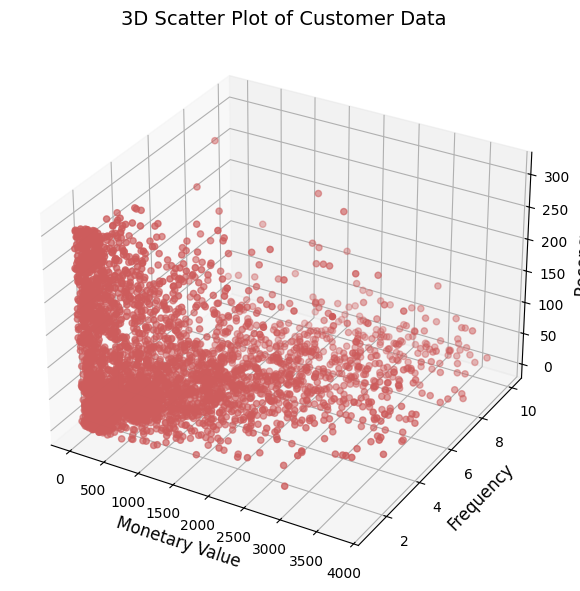

In [79]:

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"],
    color='indianred'
)

ax.set_xlabel('Monetary Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)
ax.set_title('3D Scatter Plot of Customer Data', fontsize=14)

plt.tight_layout()
plt.show()

### 3D Scatter Plot (Before Standardization)

The 3D scatter plot visualizes customers using three key features:

- **X-axis**: Monetary Value (total amount spent)
- **Y-axis**: Frequency (number of purchases)
- **Z-axis**: Recency (days since last purchase)

Each point represents a customer. The dense clustering near the origin indicates that most customers:
- Have low to moderate spending
- Purchase infrequently
- Made purchases a long time ago

Some points far from the cluster may represent potential outliers — such as high spenders, highly frequent buyers, or very recent purchaser

This process ensures that all features are on the same scale, making them suitable for clustering or machine learning models without one feature dominating due to its larger value range.


In [78]:
scaler = StandardScaler()

scaled_data =  scaler.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])

scaled_data

array([[-0.89953926, -0.40975008,  0.94143701],
       [ 0.5161044 , -0.40975008, -1.00514989],
       [-0.83599256, -0.86947898, -0.15201613],
       ...,
       [-0.64481271, -0.86947898,  2.51552888],
       [ 0.42177804, -0.40975008,  0.30459067],
       [ 1.7090034 ,  0.50970773, -0.82491036]])

In [53]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.899539,-0.409750,0.941437
1,0.516104,-0.409750,-1.005150
2,-0.835993,-0.869479,-0.152016
3,1.617523,-0.409750,-0.524511
4,-0.738133,-0.869479,-0.909022
...,...,...,...
4280,-0.320001,1.429166,-0.824910
4281,-0.602268,-0.869479,-0.236128
4282,-0.644813,-0.869479,2.515529
4283,0.421778,-0.409750,0.304591


#### Standardization of RFM Features

To ensure that the **MonetaryValue**, **Frequency**, and **Recency** features are on the same scale, we applied **standardization** using `StandardScaler()`.

#### Why Standardization?
Different features can have different units and ranges. Standardization transforms each feature so that it has:
- A **mean (μ) = 0**
- A **standard deviation (σ) = 1**

This prevents features with larger ranges from dominating the analysis, especially in distance-based algorithms like K-Means.

#### Formula Used for Standardization:

For each feature value \( x \), the standardized value \( z \) is calculated as:

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- \( x \) is the original value,
- \( \mu \) is the mean of the feature,
- \( \sigma \) is the standard deviation of the feature.

#### Steps Performed:
1. **`StandardScaler()`** was used to scale the `MonetaryValue`, `Frequency`, and `Recency` columns of the non-outlier data.
2. The result was stored in `scaled_data_df`, preserving the original customer index.

This standardized dataset is now ready for clustering or other machine learning tasks that are sensitive to feature scale.


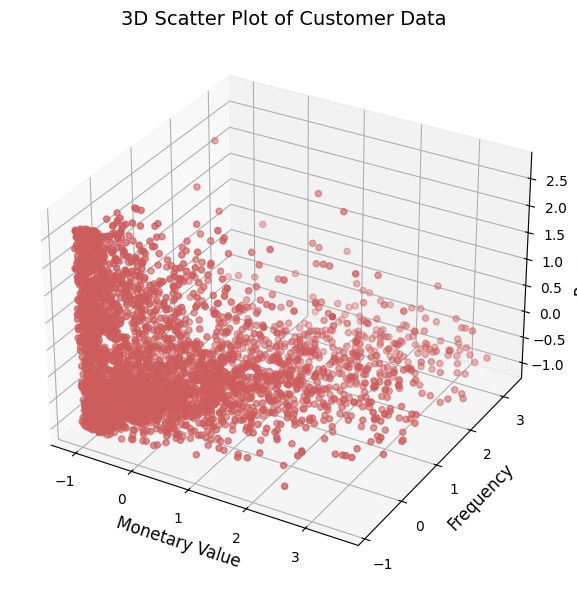

In [ ]:

fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(
    scaled_data_df["MonetaryValue"],
    scaled_data_df["Frequency"],
    scaled_data_df["Recency"],
    color='indianred'
)

ax.set_xlabel('Monetary Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)
ax.set_title('3D Scatter Plot of Customer Data', fontsize=14)

plt.tight_layout()
plt.show()

#### Observations from the Plot

-  All three variables now have a **mean close to 0** and a **standard deviation close to 1**.
-  The data is **centered around the origin (0, 0, 0)**, indicating **successful standardization**.
-  **Outliers are more visually distinguishable** after scaling, which helps with **better clustering or anomaly detection**.


## Clustering with KMeans

####  Finding Perfect Number of Clustures using Elbow Method & Silhouette Score

In this section, we apply **KMeans Clustering** to segment the data based on the standardized features: **MonetaryValue, Frequency, and Recency**.

####  KMeans Clustering
KMeans is an **unsupervised learning algorithm** that partitions the dataset into **K clusters**. It works by:
1. Randomly initializing K cluster centroids.
2. Assigning each data point to the nearest centroid.
3. Recomputing the centroids as the average of assigned points.
4. Repeating steps 2–3 until convergence.

We evaluate the performance of KMeans for different values of **K (from 2 to 12)** using:

---

####  Elbow Method (Inertia)
- **Inertia** is the **sum of squared distances** from each point to its assigned cluster center.
- Lower inertia is better, but adding more clusters always reduces inertia.
- The "elbow point" in the plot helps us choose the **optimal K** beyond which the inertia reduction becomes minimal.

$$
\text{Inertia} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

---

#### Silhouette Score
- **Silhouette Score** measures how well each data point fits within its assigned cluster and how distinct that cluster is from others.
- The score ranges from **-1 to 1**:
  - **+1**: Points are well matched to their cluster.
  - **0**: Points are on the border of two clusters.
  - **-1**: Points may have been assigned to the wrong cluster.

$$
s(i) = \frac{b(i) - a(i)}{\max\left( a(i),\ b(i) \right)}
$$
Where:
- \( a \) = average intra-cluster distance (within the same cluster)
- \( b \) = average nearest-cluster distance (to the closest cluster)

Higher silhouette scores indicate **better clustering performance**.

---

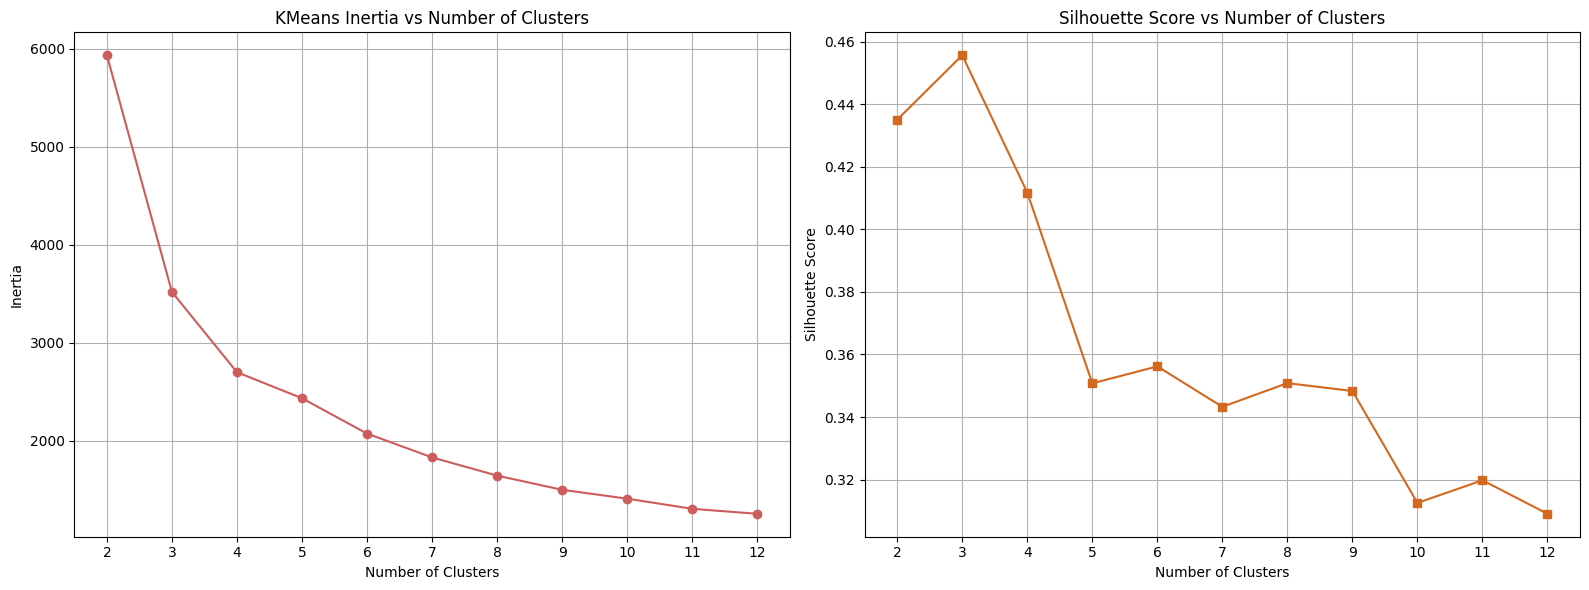

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

max_k = 12
inertia = []
silhouette_scores = []

for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    labels = kmeans.fit_predict(scaled_data_df)

    inertia.append(kmeans.inertia_)
    score = silhouette_score(scaled_data_df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(16,6))

# Elbow Plot
plt.subplot(1, 2, 1)
plt.plot(range(2, max_k + 1), inertia, marker='o', color='indianred')
plt.title("KMeans Inertia vs Number of Clusters", fontsize=12)
plt.xlabel("Number of Clusters", fontsize=10)
plt.ylabel("Inertia", fontsize=10)
plt.xticks(range(2, max_k + 1))
plt.grid(True)

# Silhouette Score Plot
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='s', color='chocolate')
plt.title("Silhouette Score vs Number of Clusters", fontsize=12)
plt.xlabel("Number of Clusters", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.xticks(range(2, max_k + 1))
plt.grid(True)

plt.tight_layout()
plt.show()

### Optimal Number of Clusters: **4**

Based on the above evaluation plots:

---

####  **Elbow Method (Left Plot)**

- The inertia significantly drops until **k = 4**, after which the rate of decrease slows down.
- This indicates a point of **diminishing returns**, known as the **"elbow point"**.
- Beyond 4 clusters, adding more clusters doesn't significantly reduce the within-cluster sum of squares.

---

####  **Silhouette Score (Right Plot)**

- The silhouette score reaches a **local maximum at k = 3**, but the score for **k = 4** is still relatively high and better balanced in terms of cluster separation.
- After **k = 4**, the score continues to decline, indicating worse cluster cohesion and separation.

---

#### Conclusion:

- Choosing **4 clusters** offers a good trade-off between **compactness** (inertia) and **separation** (silhouette score).
- Therefore, **k = 4** is selected as the optimal number of clusters for further analysis.


In [56]:
kmeans = KMeans(n_clusters=4,random_state=42,max_iter=1000)

labels = kmeans.fit_predict(scaled_data_df)

labels

array([3, 0, 1, ..., 3, 0, 0])

In [57]:
non_outliers_df['Cluster']=labels

C:\Users\admin\AppData\Local\Temp\ipykernel_19060\1423563174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster']=labels


In [58]:
non_outliers_df.head(4)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,1
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0


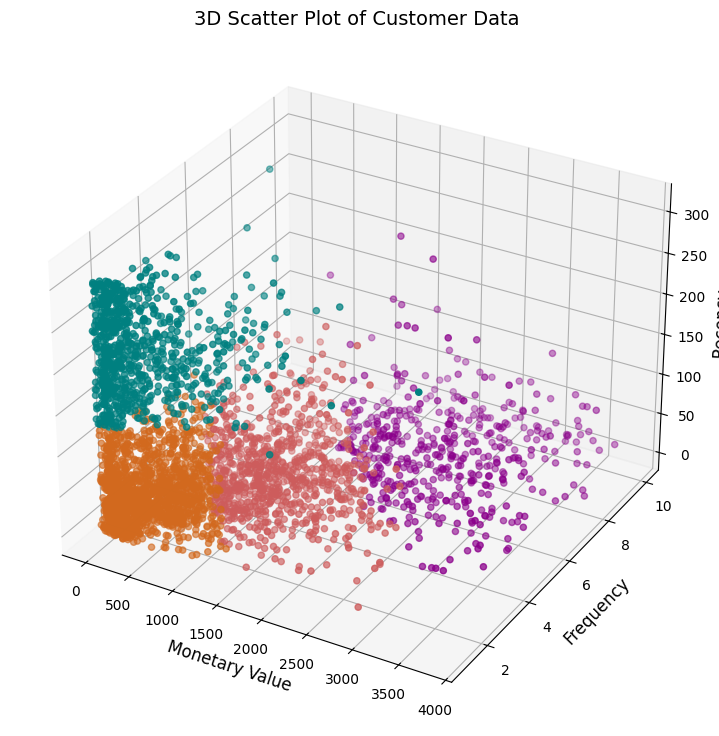

In [59]:

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')

cluster_colors = {0:'indianred', 1:'chocolate', 2:'darkmagenta',3:'teal'}

colors = non_outliers_df['Cluster'].map(cluster_colors)

ax.scatter(
    non_outliers_df["MonetaryValue"],
    non_outliers_df["Frequency"],
    non_outliers_df["Recency"],
    c = colors,
    marker='o'
)

ax.set_xlabel('Monetary Value', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_zlabel('Recency', fontsize=12)
ax.set_title('3D Scatter Plot of Customer Data', fontsize=14)

plt.show()

#### Insights from the 3D K-Means Clustering Plot

**Axes:**
- **X-axis:** Monetary Value (how much a customer spends)
- **Y-axis:** Frequency (how often they purchase)
- **Z-axis:** Recency (how recently they made a purchase)

**Color Coding:**
- Cluster 0 → `indianred`
- Cluster 1 → `chocolate`
- Cluster 2 → `darkmagenta`
- Cluster 3 → `teal`

---

### Updated Cluster-Based Customer Segments

1. **At-Risk Big Spenders** (`indianred`, Cluster 0):
   - High monetary
   - Low frequency
   - High recency  
   → Previously valuable, but haven't purchased recently.

2. **Frequent Low Spenders** (`chocolate`, Cluster 1):
   - Low monetary
   - High frequency
   - Low-to-mid recency  
   → Loyal but low-value; may respond to upsell offers.

3. **High-Value Loyal Customers** (`darkmagenta`, Cluster 2):
   - High monetary
   - High frequency
   - Low recency  
   → Best customers: buy often, spend big, and recently.

4. **Dormant or Inactive Customers** (`teal`, Cluster 3):
   - Low monetary
   - Low frequency
   - High recency  
   → Haven’t bought in a while; consider re-engagement campaigns.

---


## Customer Profiling

In [60]:
non_outliers_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,1
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,1


In [61]:
cluster_summary = non_outliers_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Customer ID': 'count'  # Optional: size of cluster
}).rename(columns={'Customer ID': 'Customer Count'})

non_outliers_summury_df = cluster_summary.reset_index()
print(non_outliers_summury_df)

   Cluster     Recency  Frequency  MonetaryValue  Customer Count
0        0   47.887387   3.879505    1296.626295             888
1        1   50.291492   1.636681     423.742553            1434
2        2   35.196319   7.026585    2401.042031             489
3        3  221.114428   1.522388     410.204320             804


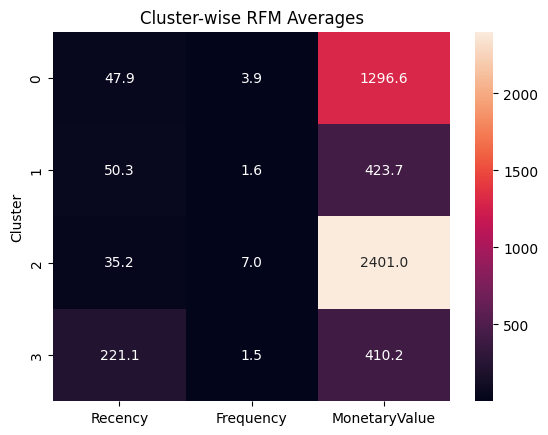

In [62]:
sns.heatmap(cluster_summary[['Recency', 'Frequency', 'MonetaryValue']], annot=True, fmt=".1f")
plt.title("Cluster-wise RFM Averages")
plt.show()

In [63]:
for i in range(0,4):
    print(f"Total MonitoryValue from {i} Cluster: ",non_outliers_df[non_outliers_df['Cluster']==i]['MonetaryValue'].sum())


Total MonitoryValue from 0 Cluster:  1151404.1500000001
Total MonitoryValue from 1 Cluster:  607646.821
Total MonitoryValue from 2 Cluster:  1174109.5529999998
Total MonitoryValue from 3 Cluster:  329804.273


###  Cluster Interpretation Table

| **Cluster** | **Recency ↓ (lower = recent)** | **Frequency ↑ (higher = frequent)** | **Monetary ↑ (higher = valuable)** | **Customer Count** | **Segment Definition** |
|------------:|-------------------------------:|------------------------------------:|-----------------------------------:|--------------------:|-------------------------|
| **0**       | 47.88                          | 3.88                               | 1296.63                           | 888                | Loyal Customers — regularly engaged, decent spend |
| **1**       | 50.29                          | 1.64                               | 423.74                            | 1434               | Low Engagement — infrequent and low spending |
| **2**       | 35.20                          | 7.03                               | 2401.04                           | 489                | High-Value Champions — very active and big spenders |
| **3**       | 221.11                         | 1.52                               | 410.20                            | 804                | Lost or Dormant — haven't purchased in a long time |

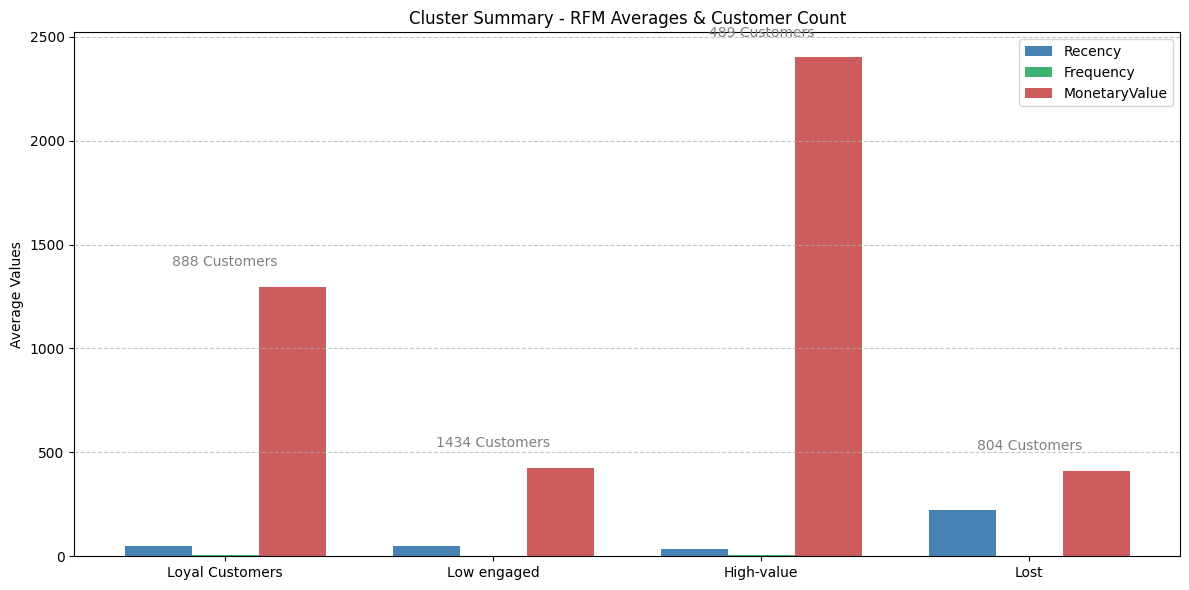

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Data from cluster_summary
clusters = ['Loyal Customers', 'Low engaged', 'High-value', 'Lost']
recency = non_outliers_summury_df['Recency']
frequency = non_outliers_summury_df['Frequency']
monetary = non_outliers_summury_df['MonetaryValue']
customer_count = non_outliers_summury_df['Customer Count']

# Bar chart setup
x = np.arange(len(clusters))
bar_width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, recency, width=bar_width, label='Recency', color='steelblue')
plt.bar(x, frequency, width=bar_width, label='Frequency', color='mediumseagreen')
plt.bar(x + bar_width, monetary, width=bar_width, label='MonetaryValue', color='indianred')

# Customer count annotations
for i in range(len(clusters)):
    plt.text(x[i], max(recency[i], frequency[i], monetary[i]) + 100,
             f'{customer_count[i]} Customers', ha='center', fontsize=10, color='gray')

# Final touches
plt.xticks(x, clusters)
plt.ylabel('Average Values')
plt.title('Cluster Summary - RFM Averages & Customer Count')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

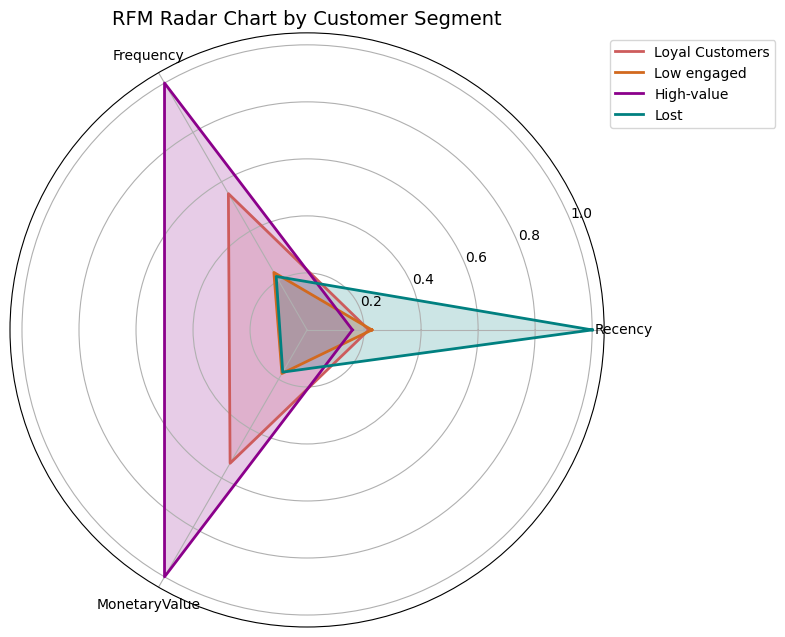

In [ ]:

# Segment labels and metric labels
segments = ['Loyal Customers', 'Low engaged', 'High-value', 'Lost']
labels = ['Recency', 'Frequency', 'MonetaryValue']
data = non_outliers_summury_df[labels].values

# Normalize each metric across clusters
normalized_data = [[val / max(col) for val, col in zip(row, data.T)] for row in data]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # repeat first angle to close the chart

# Color map by cluster index
color_map = {0:'indianred', 1:'chocolate', 2:'darkmagenta', 3:'teal'}

# Plot
plt.figure(figsize=(8, 8))
for i, stats in enumerate(normalized_data):
    stats += stats[:1]  # close the polygon
    plt.polar(angles, stats, label=segments[i], color=color_map[i], linewidth=2)
    plt.fill(angles, stats, alpha=0.2, color=color_map[i])

# Styling
plt.xticks(angles[:-1], labels)
plt.title('RFM Radar Chart by Customer Segment', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()

####  RFM Radar Chart by Customer Segment

The radar chart below displays normalized **Recency, Frequency, and Monetary** scores (0–1 scale) for four distinct customer segments identified through clustering.

Each axis represents:

- **Recency**: How recently a customer made a purchase (lower is better).
- **Frequency**: How often they purchase (higher is better).
- **Monetary Value**: How much they spend (higher is better).

---

####  Segment Overview and Strategies:

| Cluster | Color         | Segment Name    | Characteristics                                                                 | Recommended Actions |
|--------:|---------------|------------------|----------------------------------------------------------------------------------|----------------------|
| 0       | `indianred`   | **Loyal Customers** | ✅ Low Recency → Recent buyers<br>✅ High Frequency and Monetary → Frequent & big spenders | - Reward with loyalty programs<br>- Offer exclusive discounts<br>- Ask for referrals |
| 1       | `chocolate`   | **Low Engaged**     | ⚠️ Moderate Recency, Frequency, and Spend<br>🟠 Middle-of-the-road customers           | - Run engagement campaigns<br>- Promote new arrivals or seasonal deals |
| 2       | `darkmagenta` | **High-Value**      | ✅ High Frequency & Monetary<br>❗️ High Recency → Haven't purchased in a while         | - Send win-back emails<br>- Offer limited-time discounts<br>- Highlight new offers |
| 3       | `teal`        | **Lost**            | ❌ High Recency (long ago)<br>❌ Low Frequency and Spend                             | - Re-engagement emails<br>- Exit surveys<br>- Consider churn retargeting ads |

---

####  Interpretation Notes:
- Radar shape spread shows segment strength on each axis.
- **Loyal Customers** are well-rounded across all axes.
- **High-value** customers are heavy spenders but may churn if not re-engaged.
- **Lost** customers show sharp decline in all RFM areas.

---

> These insights guide tailored marketing and retention strategies to maximize customer lifetime value.


In [66]:
recency_outlier_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
66,12439.0,1158.18,2,2010-01-26 12:11:00,317
69,12443.0,365.31,1,2009-12-07 15:42:00,367
83,12470.0,211.95,1,2010-01-19 11:01:00,324
97,12487.0,285.30,1,2009-12-09 11:36:00,365
121,12531.0,1645.98,1,2010-01-22 14:17:00,321


### Outlier Analysis

In [82]:
# Identify overlap between monetary and frequency outliers
overlap_indices = monetary_outlier_df.index.intersection(frequency_outlier_df.index)

# Separate outliers based on intersection
monetary_only = monetary_outlier_df.loc[~monetary_outlier_df.index.isin(overlap_indices)].copy()
frequency_only = frequency_outlier_df.loc[~frequency_outlier_df.index.isin(overlap_indices)].copy()
monetary_and_frequency = monetary_outlier_df.loc[overlap_indices].copy()

# Assign cluster flags
monetary_only["Cluster"] = -1
frequency_only["Cluster"] = -2
monetary_and_frequency["Cluster"] = -3

# Combine into one DataFrame
outlier_clusters_df = pd.concat([monetary_only, frequency_only, monetary_and_frequency])

# Optional: sort or reset index if needed
outlier_clusters_df = outlier_clusters_df.sort_index().reset_index()

outlier_clusters_df.head()

,index,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
1,25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
2,42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
3,48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
4,50,12417.0,2791.81,11,2010-10-25 14:27:00,45,-2


#### Outlier Detection: Combining Monetary and Frequency Outliers

In this step, we identify and categorize customers who are outliers based on **Monetary** and **Frequency** values.

---

#### Logic Explained:

1. **Identify Overlapping Outliers**  
   We calculate the intersection of indices to find customers who are outliers in both `Monetary` and `Frequency` dimensions:

   ```python
   overlap_indices = monetary_outlier_df.index.intersection(frequency_outlier_df.index)
   ```

2. **Separate Outliers by Type**  
   - **Monetary Only Outliers**: Present only in the `monetary_outlier_df`, not in the overlap  
   - **Frequency Only Outliers**: Present only in the `frequency_outlier_df`, not in the overlap  
   - **Overlapping Outliers**: Present in both `monetary_outlier_df` and `frequency_outlier_df`

   ```python
   monetary_only = monetary_outlier_df.loc[~monetary_outlier_df.index.isin(overlap_indices)].copy()
   frequency_only = frequency_outlier_df.loc[~frequency_outlier_df.index.isin(overlap_indices)].copy()
   monetary_and_frequency = monetary_outlier_df.loc[overlap_indices].copy()
   ```

3. **Assign Cluster Labels for Visualization and Analysis**  
   We assign negative cluster IDs to outliers for clearer separation from regular clusters:
   - `-1` → Monetary Outliers Only  
   - `-2` → Frequency Outliers Only  
   - `-3` → Both Monetary and Frequency Outliers

   ```python
   monetary_only["Cluster"] = -1
   frequency_only["Cluster"] = -2
   monetary_and_frequency["Cluster"] = -3
   ```

4. **Combine into One DataFrame**  
   We concatenate all the outlier subsets and optionally sort/reset the index:

   ```python
   outlier_clusters_df = pd.concat([monetary_only, frequency_only, monetary_and_frequency])
   outlier_clusters_df = outlier_clusters_df.sort_index().reset_index()
   ```

5. **Preview the Resulting DataFrame**  
   View the first few rows to confirm structure:

   ```python
   outlier_clusters_df.head()
   ```

---

### Actions Taken:

- Identified and labeled customers who are outliers in **Monetary**, **Frequency**, or both dimensions  
- Assigned them custom cluster IDs (-1, -2, -3)  
- Combined all into a single DataFrame for further analysis or visualization


In [85]:
outlier_cluster_summary = outlier_clusters_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'Customer ID': 'count'  # Optional: size of cluster
}).rename(columns={'Customer ID': 'Customer Count'})

outliers_summury_df = outlier_cluster_summary.reset_index()
print(outliers_summury_df)

   Cluster    Recency  Frequency  MonetaryValue  Customer Count
0       -3  14.810277  24.280632   15913.577573             253
1       -2  20.986842  13.815789    2675.785526              76
2       -1  52.694118   6.582353    6643.717118             170


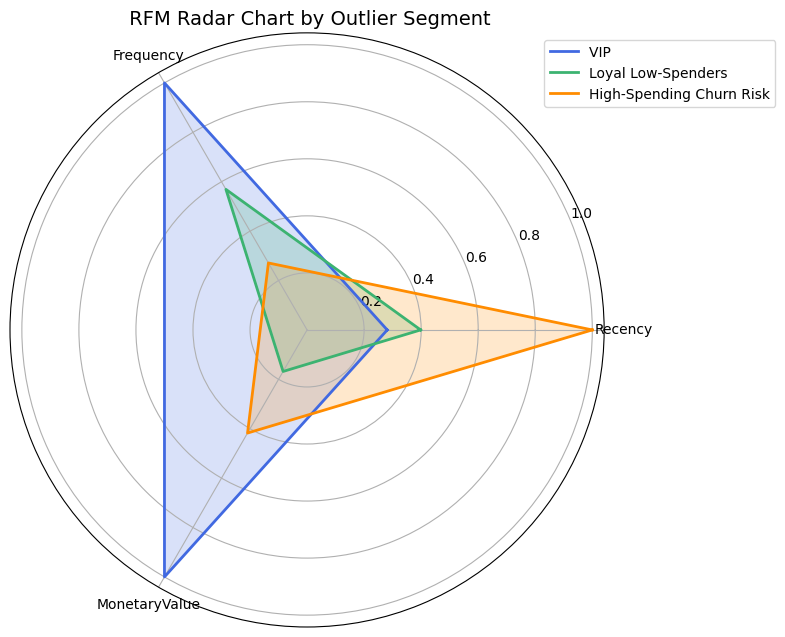

In [ ]:
# Segment labels and metric labels
segments = ['Elite Buyers ', 'Frequent Shoppers', 'Occational Spenders']
labels = ['Recency', 'Frequency', 'MonetaryValue']
data = outliers_summury_df[labels].values  # Ensure your dataframe name matches

# Normalize each metric across clusters
normalized_data = [[val / max(col) for val, col in zip(row, data.T)] for row in data]

# Radar chart setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # repeat first angle to close the chart

# Updated color map (professional, clean)
color_map = {
    0: '#4169E1',   # Royal Blue for VIP Overachievers
    1: '#3CB371',   # Medium Sea Green for Loyal Low-Spenders
    2: '#FF8C00',   # Dark Orange for High-Spending Churn Risk
}

# Plot Radar Chart
plt.figure(figsize=(8, 8))
for i, stats in enumerate(normalized_data):
    stats += stats[:1]  # close the polygon
    plt.polar(angles, stats, label=segments[i], color=color_map[i], linewidth=2)
    plt.fill(angles, stats, alpha=0.2, color=color_map[i])

# Chart styling
plt.xticks(angles[:-1], labels)
plt.title(' RFM Radar Chart by Outlier Segment', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


#### Outlier Cluster Summary and Interpretation

Each row in the table below represents one of the **outlier customer clusters**, along with their **average RFM metrics**, **assigned name**, and **number of customers**:

| Cluster | Assigned Name         | Avg. Recency | Avg. Frequency | Avg. Monetary Value | Customer Count |
|---------|------------------------|--------------|----------------|----------------------|----------------|
| **-3**  | `Elite Buyers`         | 14.81        | 24.28          | 15,913.58            | 253            |
| **-2**  | `Frequent Shoppers`    | 20.99        | 13.82          | 2,675.79             | 76             |
| **-1**  | `Occasionl Spenders`   | 52.69        | 6.58           | 6,643.72             | 170            |

---

#### Interpretation:

####  `Elite Buyers` (Royal Blue)
- **Very recent**, **high frequency**, and **very high spenders**
- These are your **most valuable and loyal customers**
-  *Action*: Priority group for loyalty programs, personalized offers, and early product access

####  `Frequent Shoppers` (Sea Green)
- Buy **often** but spend **less per transaction**
- Ideal for **routine low-ticket purchases**
-  *Action*: Encourage bulk deals, product bundles, and loyalty rewards

####  `Occasionl Spenders` (Orange)
- **Occasional buyers** who spend **large amounts**
- Less frequent and older transactions
-  *Action*: Run **reactivation campaigns**, target with **exclusive high-ticket promotions**

---

###  Summary:

This segmentation gives strategic clarity to how different customer outliers behave. It enables:
- Tailored **marketing approaches**
- Smarter **resource allocation**
- **Data-driven decision-making** for customer retention and revenue growth


In [89]:
cluster_labels = {
    0: "LOYAL",
    1: "LOW-ENGAGE",
    2: "HIGH-VALUE",
    3: "LOST",
    -1: "ELIGHT",
    -2: "FREQUENT",
    -3: "OCCASIONALS"
}

In [90]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,index
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3,NaN
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,NaN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,1,NaN
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,NaN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,1,NaN
...,...,...,...,...,...,...,...
494,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,4237.0
495,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,4241.0
496,18245.0,3757.92,13,2010-11-25 16:52:00,14,-2,4250.0
497,18251.0,21964.14,8,2010-09-20 13:26:00,80,-1,4253.0


In [91]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,index,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,3,NaN,LOST
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,NaN,LOYAL
2,12348.0,221.16,1,2010-09-27 14:59:00,73,1,NaN,LOW-ENGAGE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,NaN,LOYAL
4,12351.0,300.93,1,2010-11-29 15:23:00,10,1,NaN,LOW-ENGAGE
...,...,...,...,...,...,...,...,...
494,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,4237.0,OCCASIONALS
495,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,4241.0,OCCASIONALS
496,18245.0,3757.92,13,2010-11-25 16:52:00,14,-2,4250.0,FREQUENT
497,18251.0,21964.14,8,2010-09-20 13:26:00,80,-1,4253.0,ELIGHT


C:\Users\admin\AppData\Local\Temp\ipykernel_19060\1716019574.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


<Figure size 1400x800 with 0 Axes>

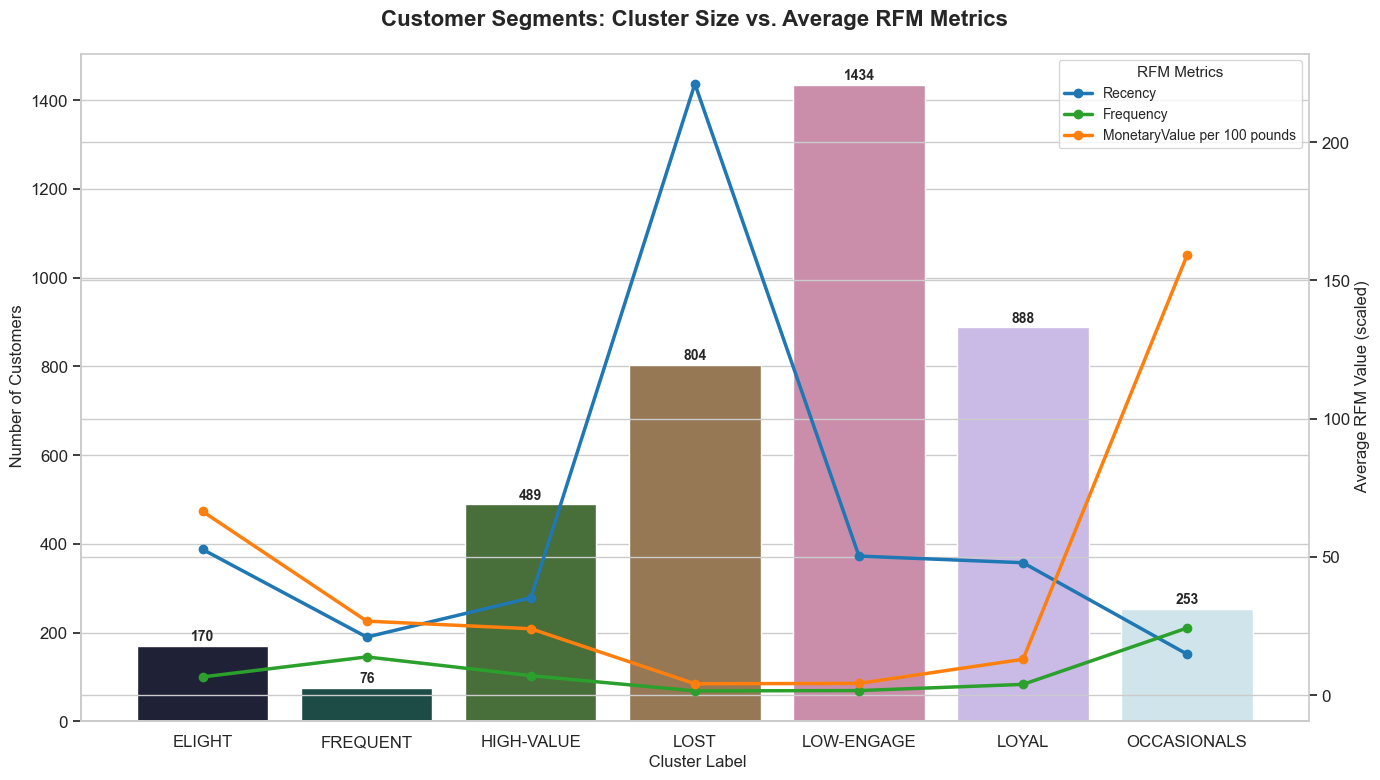

In [96]:
# Prepare values
cluster_counts = full_clustering_df['ClusterLabel'].value_counts().sort_index()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

# Set seaborn theme
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 8))
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barplot: Cluster size
bar_palette = sns.color_palette("cubehelix", len(cluster_counts))
bar = sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    ax=ax1,
    palette=bar_palette
)

# Annotations on bars
for i, val in enumerate(cluster_counts.values):
    ax1.text(i, val + 5, f"{val}", ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_ylabel(' Number of Customers', fontsize=12)
ax1.set_xlabel(' Cluster Label', fontsize=12)
ax1.set_title('Customer Segments: Cluster Size vs. Average RFM Metrics', fontsize=16, weight='bold', pad=20)

# Remove top/right spines
sns.despine(ax=ax1, right=True, top=True)

# Create secondary axis
ax2 = ax1.twinx()
colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # for Recency, Frequency, Monetary

for idx, col in enumerate(feature_means.columns):
    ax2.plot(
        feature_means.index,
        feature_means[col],
        marker='o',
        linestyle='-',
        linewidth=2.5,
        label=col,
        color=colors[idx]
    )

ax2.set_ylabel(' Average RFM Value (scaled)', fontsize=12)
ax2.legend(loc='upper right', title='RFM Metrics', title_fontsize=11, fontsize=10)

# Final layout adjustments
plt.tight_layout()
plt.show()
